# Comparison of Two Methods for Hourly Load Forecasting

## Compares Facebook Prophet vs Neural Network

In [38]:
import pandas as pd
import numpy as np

from fbprophet import Prophet
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("../data/AEP_hourly.csv")
df.rename(columns={'Datetime':'ds','AEP_MW':'y'},inplace=True)



index = pd.to_datetime(df['ds'])
df_idx = df.copy()
df_idx.set_index(index,drop=True,inplace=True)
df_idx.sort_index(axis=1,ascending=True)
data = df_idx[['y']]


#Data filters Neural Network
#Train Test sets for univariate time series
train = data.loc['2004-12-31 01:00:00':'2005-12-31 01:00:00']
test = data.loc['2005-12-31 02:00:00':'2006-12-31 01:00:00']

#filter for FB Prophet
df = df.query("ds > '2004-12-31 01:00:00' and ds <= '2006-12-31 01:00:00'")



print(train.shape)
print(test.shape)


(8759, 1)
(8758, 1)


In [22]:


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [23]:
train_sc_df = pd.DataFrame(train_sc, columns=['y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['y'].shift(s)

X_train = train_sc_df.dropna().drop('y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [24]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (8758 x 1)
Test size: (8757 x 1)


/Users/steve/opt/anaconda3/envs/Python37/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


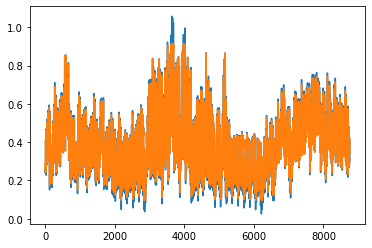

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)

In [26]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: 0.922566


In [27]:
import tensorflow as tf

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

In [28]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/200
548/548 [==============================] - 1s 754us/step - loss: 0.6072
Epoch 2/200
548/548 [==============================] - 0s 768us/step - loss: 0.1050
Epoch 3/200
548/548 [==============================] - 0s 793us/step - loss: 0.0560
Epoch 4/200
548/548 [==============================] - 0s 749us/step - loss: 0.0471
Epoch 5/200
548/548 [==============================] - 0s 688us/step - loss: 0.0394
Epoch 6/200
548/548 [==============================] - 0s 758us/step - loss: 0.0317
Epoch 7/200
548/548 [==============================] - 0s 719us/step - loss: 0.0240
Epoch 8/200
548/548 [==============================] - 0s 729us/step - loss: 0.0170
Epoch 9/200
548/548 [==============================] - 0s 735us/step - loss: 0.0118
Epoch 10/200
548/548 [==============================] - 0s 693us/step - loss: 0.0075
Epoch 11/200
548/548 [==============================] - 0s 681us/step - loss: 0.0050
Epoch 12/200
548/548 [==============================] - 0s 741us/step - lo

548/548 [==============================] - 0s 445us/step - loss: 0.0027
Epoch 98/200
548/548 [==============================] - 0s 446us/step - loss: 0.0026
Epoch 99/200
548/548 [==============================] - 0s 448us/step - loss: 0.0028
Epoch 100/200
548/548 [==============================] - 0s 450us/step - loss: 0.0027
Epoch 101/200
548/548 [==============================] - 0s 439us/step - loss: 0.0027
Epoch 102/200
548/548 [==============================] - 0s 445us/step - loss: 0.0026
Epoch 103/200
548/548 [==============================] - 0s 438us/step - loss: 0.0027
Epoch 104/200
548/548 [==============================] - 0s 444us/step - loss: 0.0026
Epoch 105/200
548/548 [==============================] - 0s 463us/step - loss: 0.0027
Epoch 106/200
548/548 [==============================] - 0s 434us/step - loss: 0.0027
Epoch 107/200
548/548 [==============================] - 0s 451us/step - loss: 0.0026
Epoch 108/200
548/548 [==============================] - 0s 443us/step

548/548 [==============================] - 0s 444us/step - loss: 0.0027
Epoch 193/200
548/548 [==============================] - 0s 435us/step - loss: 0.0027
Epoch 194/200
548/548 [==============================] - 0s 455us/step - loss: 0.0027
Epoch 195/200
548/548 [==============================] - 0s 463us/step - loss: 0.0027
Epoch 196/200
548/548 [==============================] - 0s 451us/step - loss: 0.0027
Epoch 197/200
548/548 [==============================] - 0s 434us/step - loss: 0.0026
Epoch 198/200
548/548 [==============================] - 0s 443us/step - loss: 0.0026
Epoch 199/200
548/548 [==============================] - 0s 440us/step - loss: 0.0026
Epoch 200/200
548/548 [==============================] - 0s 463us/step - loss: 0.0027


R-Squared: 0.907905


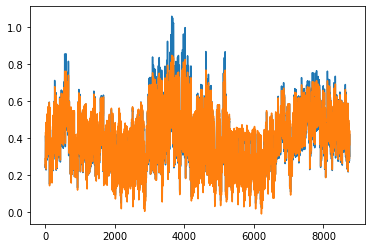

In [75]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [21]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

NameError: name 'K' is not defined

R-Squared: 0.907905


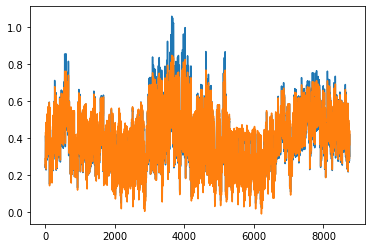

In [76]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



print('MAE: %F'%(mean_absolute_error(y_test,y_pred)))
print('MSE: %F'%(mean_squared_error(y_test,y_pred)))

MAE: 0.033674
MSE: 0.002165


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 54.2 s, sys: 5.58 s, total: 59.8 s
Wall time: 44.2 s


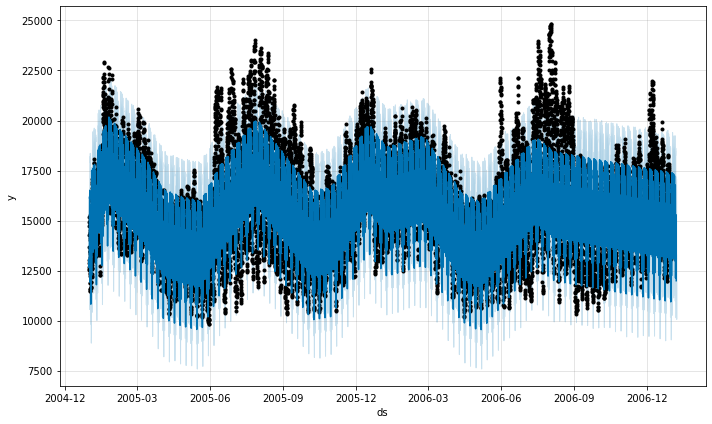

In [39]:
%%time
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=(24*7),freq='H')
forecast = m.predict(future)

fig1 = m.plot(forecast)

In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-12-31 02:00:00,14802.595783,11034.426627,14903.659856,14802.595783,14802.595783,-1736.031620,-1736.031620,-1736.031620,-2211.787581,-2211.787581,-2211.787581,475.755961,475.755961,475.755961,0.0,0.0,0.0,13066.564162
1,2004-12-31 03:00:00,14808.374180,10793.392226,14568.119464,14808.374180,14808.374180,-2118.797845,-2118.797845,-2118.797845,-2586.200088,-2586.200088,-2586.200088,467.402243,467.402243,467.402243,0.0,0.0,0.0,12689.576335
2,2004-12-31 04:00:00,14814.152577,10702.699944,14543.739041,14814.152577,14814.152577,-2179.279019,-2179.279019,-2179.279019,-2637.357899,-2637.357899,-2637.357899,458.078880,458.078880,458.078880,0.0,0.0,0.0,12634.873558
3,2004-12-31 05:00:00,14819.930974,11090.786731,14939.854479,14819.930974,14819.930974,-1887.093177,-1887.093177,-1887.093177,-2334.726071,-2334.726071,-2334.726071,447.632894,447.632894,447.632894,0.0,0.0,0.0,12932.837797
4,2004-12-31 06:00:00,14825.709371,11668.299639,15421.161875,14825.709371,14825.709371,-1276.537456,-1276.537456,-1276.537456,-1712.442386,-1712.442386,-1712.442386,435.904930,435.904930,435.904930,0.0,0.0,0.0,13549.171916


In [40]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='366 days', period='30 days', horizon = '30 days')



from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(20)

INFO:fbprophet:Making 12 forecasts with cutoffs between 2006-01-05 01:00:00 and 2006-12-01 01:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days 00:00:00,4.032760e+06,2008.173326,1472.563124,0.100056,0.065766,0.728949
1,3 days 01:00:00,4.075008e+06,2018.664984,1483.116188,0.100741,0.066540,0.726632
2,3 days 02:00:00,4.127942e+06,2031.733709,1496.044987,0.101593,0.067558,0.724314
3,3 days 03:00:00,4.185521e+06,2045.854581,1510.235942,0.102531,0.068237,0.721997
4,3 days 04:00:00,4.245062e+06,2060.354883,1524.634687,0.103460,0.069295,0.718617
5,3 days 05:00:00,4.303398e+06,2074.463234,1539.299822,0.104345,0.070637,0.713982
6,3 days 06:00:00,4.364040e+06,2089.028476,1552.515830,0.104988,0.071987,0.708188
7,3 days 07:00:00,4.423856e+06,2103.296477,1565.728080,0.105575,0.072086,0.702395
8,3 days 08:00:00,4.474084e+06,2115.203162,1578.752439,0.106188,0.074180,0.697760
9,3 days 09:00:00,4.510900e+06,2123.888041,1589.779372,0.106734,0.076691,0.695442


In [72]:
y_pred = X_valid[:,-1]
print(np.mean(keras.losses.mean_squared_error(y_valid,y_pred)))

ValueError: key of type tuple not found and not a MultiIndex

# Results

Facebook Prophet's cross validation is more sophisticated because it looks at batches of historical data to assess goodness of fit for different time windows

To get a good comparison, we need to perform the same process.

